# Wearable Data: Motion Recognition

## Plan: 11/8

- Run Supervised Learning with cross-validation (test/training data split) on data points to predict their motion classes,
then calculate the AUC against their true classes.
- Analyze the results from each method:
    - KNN
    - Decision Tree
    - Bayesian
    - Neural Networks(?)

    
- Run Unsupervised Clustering and see if the clusters are interpretable.
- Compare the interpreted cluster results with their true class and see if they work better or worse than the supervised ones:
    - Hierachical Clustering
    - K-Means

## 11/15

## Read Data

In [1]:
import pandas as pd
wearable_data = pd.read_csv("dataset-har-PUC-Rio-ugulino.csv",sep=";", header = 0, decimal = ",")

In [2]:
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [3]:
categorical_columns = ["gender"]
categorical_data = pd.DataFrame()
wearable_data["gender"] = wearable_data["gender"].astype('category')
wearable_data[categorical_columns] = wearable_data[categorical_columns].apply(lambda x: x.cat.codes)
wearable_data.head()

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting


In [4]:
categorical_columns = ["class"]
categorical_data = pd.DataFrame()
onehot_encoded_data = pd.get_dummies(wearable_data[["class"]])
categorical_data = pd.concat([categorical_data, onehot_encoded_data], axis = 1)
wearable_data = pd.concat([wearable_data.ix[:,:-1], categorical_data],axis=1)
wearable_data[0:5]

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,y3,z3,x4,y4,z4,class_sitting,class_sittingdown,class_standing,class_standingup,class_walking
0,debora,1,46,1.62,75,28.6,-3,92,-63,-23,...,104,-92,-150,-103,-147,1,0,0,0,0
1,debora,1,46,1.62,75,28.6,-3,94,-64,-21,...,104,-90,-149,-104,-145,1,0,0,0,0
2,debora,1,46,1.62,75,28.6,-1,97,-61,-12,...,104,-90,-151,-104,-144,1,0,0,0,0
3,debora,1,46,1.62,75,28.6,-2,96,-57,-15,...,104,-89,-153,-103,-142,1,0,0,0,0
4,debora,1,46,1.62,75,28.6,-1,96,-61,-13,...,104,-89,-153,-104,-143,1,0,0,0,0


In [5]:
features = wearable_data[wearable_data.columns.values[1:-5]].as_matrix()
labels = wearable_data[wearable_data.columns.values[-5:]].as_matrix()
print(features[0:2, :])
print()
print(labels[0:5, :])

[[   1.     46.      1.62   75.     28.6    -3.     92.    -63.    -23.
    18.    -19.      5.    104.    -92.   -150.   -103.   -147.  ]
 [   1.     46.      1.62   75.     28.6    -3.     94.    -64.    -21.
    18.    -18.    -14.    104.    -90.   -149.   -104.   -145.  ]]

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


## Train/Test split

In [6]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33,random_state=42)

/Users/hazelque/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Single Decision Tree

In [7]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=5)
dt.fit(features_train,labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
def print_tree(tree, feature_names):
        left      = tree.children_left
        right     = tree.children_right
        threshold = tree.threshold
        features  = [feature_names[i] for i in tree.feature]
        value = tree.value
        depth = 0

        def recurse(left, right, threshold, features, node, depth):
                depth+=1
                if (threshold[node] != -2):
                        for j in range(depth):
                            print("  ", end=""),
                        print ("if " + features[node] + " <= " + str(threshold[node]) + ":")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node],depth)
                        for j in range(depth):
                            print("  ", end=""),
                        print ("else:")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node],depth)
                else:
                        for j in range(depth):
                            print("  ", end=""),
                        print (str(value[node]))

        recurse(left, right, threshold, features, 0, 0)

In [9]:
feature_names = list(wearable_data.columns.values[1:-5])
print_tree(dt.tree_, feature_names)

  if z1 <= -68.5:
    if y3 <= 126.5:
      if y2 <= 66.5:
        if x3 <= -52.5:
          if age <= 60.5:
            if z3 <= -109.0:
              [[ 464.    0.]
 [ 464.    0.]
 [ 452.   12.]
 [  12.  452.]
 [ 464.    0.]]
            else:
              [[ 58.   0.]
 [ 57.   1.]
 [ 58.   0.]
 [ 58.   0.]
 [  1.  57.]]
          else:
            if z3 <= -366.5:
              [[ 6.  1.]
 [ 7.  0.]
 [ 7.  0.]
 [ 1.  6.]
 [ 7.  0.]]
            else:
              [[    0.  3808.]
 [ 3808.     0.]
 [ 3808.     0.]
 [ 3808.     0.]
 [ 3808.     0.]]
        else:
          if z4 <= -156.5:
            if z2 <= -80.5:
              [[  1.01580000e+04   3.00000000e+00]
 [  1.01150000e+04   4.60000000e+01]
 [  7.62100000e+03   2.54000000e+03]
 [  9.60300000e+03   5.58000000e+02]
 [  3.14700000e+03   7.01400000e+03]]
            else:
              [[  1.58100000e+03   2.55000000e+02]
 [  1.66500000e+03   1.71000000e+02]
 [  1.83500000e+03   1.00000000e+00]
 [  5.42000000e+02   1.294000

## Evaluate

In [10]:
from sklearn import metrics
pred_dt = dt.predict(features_test)

In [11]:
print(pred_dt[0:5])
print(labels_test[0:5])

[[ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]]
[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [12]:
print(pred_dt.shape[0])


54659


In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(labels_test, pred_dt, average="macro"))
print(precision_score(labels_test, pred_dt, average="macro"))
print(recall_score(labels_test, pred_dt, average="macro"))  
print(accuracy_score(labels_test, pred_dt))  

0.805260956493
0.832952545825
0.788962022974
0.870744067766


In [14]:
# Build confustion matrix for each class.
# (sklearn confusion matrix doesn't support multiclass labels)
import numpy as np
class_sitting = np.array([1, 0, 0, 0, 0])
confusion_matrix_sitting = np.zeros((2,2))
for i in range(0, pred_dt.shape[0]):
    if (pred_dt[i][0] == labels_test[i][0]):
        if (pred_dt[i][0] == class_sitting[0]):
            confusion_matrix_sitting[0][0] += 1
        else:
            confusion_matrix_sitting[1][1] += 1
    else:
        if (pred_dt[i][0] == class_sitting[0]):
            confusion_matrix_sitting[1][0] += 1
        else:
            confusion_matrix_sitting[0][1] += 1
print(confusion_matrix_sitting)

[[ 16334.    256.]
 [   115.  37954.]]


In [15]:
print("Correctly classified for sitting: ", (confusion_matrix_sitting[0][0]+confusion_matrix_sitting[1][1])/pred_dt.shape[0])

Correctly classified for sitting:  0.993212462723


In [16]:
confusion_matrix_sitting_down = np.zeros((2,2))
class_sitting_down = np.array([0, 1, 0, 0, 0])
for i in range(0, pred_dt.shape[0]):
    if (pred_dt[i][1] == labels_test[i][1]):
        if (pred_dt[i][1] == class_sitting_down[1]):
            confusion_matrix_sitting_down[0][0] += 1
        else:
            confusion_matrix_sitting_down[1][1] += 1
    else:
        if (pred_dt[i][1] == class_sitting_down[1]):
            confusion_matrix_sitting_down[1][0] += 1
        else:
            confusion_matrix_sitting_down[0][1] += 1
print(confusion_matrix_sitting_down)

[[  2847.   1062.]
 [  1098.  49652.]]


In [17]:
print("Correctly classified for sitting_down: ", (confusion_matrix_sitting_down[0][0]+confusion_matrix_sitting_down[1][1])/pred_dt.shape[0])

Correctly classified for sitting_down:  0.960482262756


In [18]:
class_standing = np.array([0, 0, 1, 0, 0])
confusion_matrix_standing = np.zeros((2,2))
for i in range(0, pred_dt.shape[0]):
    if (pred_dt[i][2] == labels_test[i][2]):
        if (pred_dt[i][2] == class_standing[2]):
            confusion_matrix_standing[0][0] += 1
        else:
            confusion_matrix_standing[1][1] += 1
    else:
        if (pred_dt[i][2] == class_standing[2]):
            confusion_matrix_standing[1][0] += 1
        else:
            confusion_matrix_standing[0][1] += 1
print(confusion_matrix_standing)

[[ 13746.   1875.]
 [  2529.  36509.]]


In [19]:
print("Correctly classified for standing: ", (confusion_matrix_standing[0][0]+confusion_matrix_standing[1][1])/pred_dt.shape[0])

Correctly classified for standing:  0.91942772462


In [20]:
class_standing_up = np.array([0, 0, 0, 1, 0])
confusion_matrix_standing_up = np.zeros((2,2))
for i in range(0, pred_dt.shape[0]):
    if (pred_dt[i][3] == labels_test[i][3]):
        if (pred_dt[i][3] == class_standing_up[3]):
            confusion_matrix_standing_up[0][0] += 1
        else:
            confusion_matrix_standing_up[1][1] += 1
    else:
        if (pred_dt[i][3] == class_standing_up[3]):
            confusion_matrix_standing_up[1][0] += 1
        else:
            confusion_matrix_standing_up[0][1] += 1
print(confusion_matrix_standing_up)

[[  1930.   2187.]
 [   721.  49821.]]


In [21]:
print("Correctly classified for standing_up: ", (confusion_matrix_standing_up[0][0]+confusion_matrix_standing_up[1][1])/pred_dt.shape[0])

Correctly classified for standing_up:  0.946797416711


In [22]:
class_walking = np.array([0, 0, 0, 0, 1])
confusion_matrix_walking = np.zeros((2,2))
for i in range(0, pred_dt.shape[0]):
    if (pred_dt[i][4] == labels_test[i][4]):
        if (pred_dt[i][4] == class_walking[4]):
            confusion_matrix_walking[0][0] += 1
        else:
            confusion_matrix_walking[1][1] += 1
    else:
        if (pred_dt[i][4] == class_walking[4]):
            confusion_matrix_walking[1][0] += 1
        else:
            confusion_matrix_walking[0][1] += 1
print(confusion_matrix_walking)

[[ 12737.   1685.]
 [  1779.  38458.]]


In [23]:
print("Correctly classified for walking: ", (confusion_matrix_walking[0][0]+confusion_matrix_walking[1][1])/pred_dt.shape[0])

Correctly classified for walking:  0.93662525842


# 12/6

## PCA

In [24]:
from sklearn.decomposition import PCA

pca_f1_score = []
pca_precision = []
pca_recall = []
pca_accuracy = []

for i in range(1, 18):
    pca = PCA(n_components = i)
    pca.fit(features)
    pca_features = pca.transform(features)
    pca_features_train, pca_features_test, pca_labels_train, pca_labels_test = train_test_split(pca_features, labels, test_size=0.33,random_state=42)
    pca_dt = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=5)
    pca_dt.fit(pca_features_train,pca_labels_train)
    pca_pred_dt = pca_dt.predict(pca_features_test)
    pca_f1_score.append(f1_score(pca_labels_test, pca_pred_dt, average="macro"))
    pca_precision.append(precision_score(pca_labels_test, pca_pred_dt, average="macro"))
    pca_recall.append(recall_score(pca_labels_test, pca_pred_dt, average="macro"))    
    pca_accuracy.append(accuracy_score(pca_labels_test, pca_pred_dt))    

In [25]:
print(pca_f1_score)
print(pca_precision)
print(pca_recall)
print(pca_accuracy)

[0.35860875545674564, 0.66456670700886067, 0.68852093126235692, 0.67902574984111697, 0.68810811689203566, 0.69797736570923341, 0.7964609849497033, 0.79550974929051343, 0.78504421774349353, 0.79089301150177316, 0.78745362700522958, 0.80375867751411345, 0.79628845736987341, 0.80098432724525082, 0.75720722443512178, 0.75722488025103507, 0.75707993104204496]
[0.61981551784258859, 0.77057035020959996, 0.78270461440005334, 0.82378055080662127, 0.86680246069404365, 0.87717777276542319, 0.81583491515772555, 0.81867448700687895, 0.81957825558612052, 0.81798673244107822, 0.80845333305444833, 0.82446031195017078, 0.8270533064138913, 0.8297895100405912, 0.86282985302212811, 0.86285278229713813, 0.86287037707044301]
[0.3167737142300992, 0.62938499446590768, 0.66517311739215379, 0.63267553619780625, 0.62702010909738981, 0.63496224860173567, 0.78232975099512281, 0.77689569205033515, 0.75857740322912037, 0.76943566266365004, 0.77182925216836773, 0.7869159389588043, 0.77524625065022978, 0.7814103042912

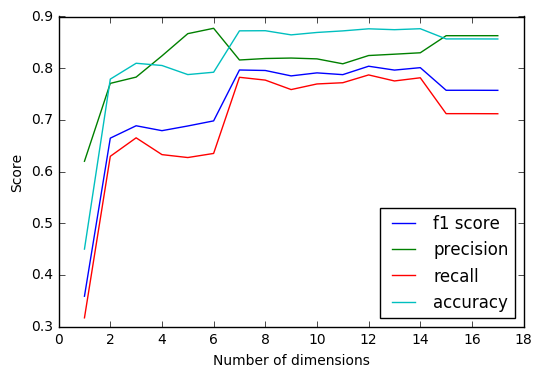

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(1, 18)

plt.plot(x, pca_f1_score)
plt.plot(x, pca_precision)
plt.plot(x, pca_recall)
plt.plot(x, pca_accuracy)
plt.legend(['f1 score', 'precision', 'recall', 'accuracy'], loc='lower right')
plt.xlabel("Number of dimensions")
plt.ylabel("Score")
plt.show()

In [27]:
pca = PCA(n_components = 3)
pca.fit(features)
pca_features = pca.transform(features)
pca_features_train, pca_features_test, pca_labels_train, pca_labels_test = train_test_split(pca_features, labels, test_size=0.33,random_state=42)
pca_x, pca_y = pca_features_train, pca_labels_train
pca_dt = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=5)
pca_dt.fit(pca_x, pca_y)
print_tree(pca_dt.tree_, feature_names)
pca_pred_dt = pca_dt.predict(pca_features_test)

  if age <= 16.887550354:
    if gender <= -147.633239746:
      if gender <= -178.382537842:
        if gender <= -207.802093506:
          if how_tall_in_meters <= -15.7008008957:
            if age <= -15.946846962:
              [[ 90.   0.]
 [ 90.   0.]
 [ 90.   0.]
 [ 90.   0.]
 [  0.  90.]]
            else:
              [[ 116.    0.]
 [  26.   90.]
 [ 116.    0.]
 [ 116.    0.]
 [  90.   26.]]
          else:
            if gender <= -343.458862305:
              [[ 17.   0.]
 [ 17.   0.]
 [  1.  16.]
 [ 17.   0.]
 [ 16.   1.]]
            else:
              [[ 1745.     0.]
 [ 1723.    22.]
 [ 1727.    18.]
 [ 1726.    19.]
 [   59.  1686.]]
        else:
          if age <= -58.5849266052:
            if age <= -70.8815460205:
              [[ 809.    0.]
 [ 801.    8.]
 [ 804.    5.]
 [ 809.    0.]
 [  13.  796.]]
            else:
              [[ 417.    0.]
 [ 415.    2.]
 [ 267.  150.]
 [ 378.   39.]
 [ 191.  226.]]
          else:
            if age <= -18.9126091003

<IPython.core.display.Javascript object>


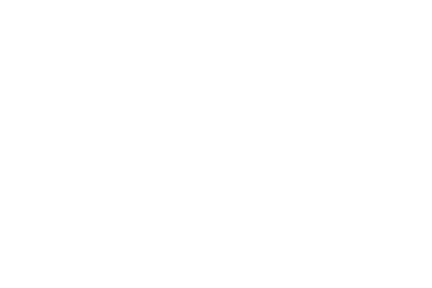

<IPython.core.display.Javascript object>


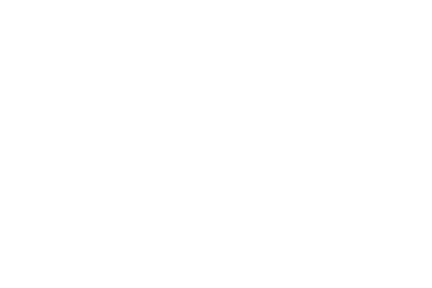

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = []
for label in labels:
    if (label[0] == 1):
        color.append('r')
    elif (label[1] == 1):
        color.append('g')
    elif (label[2] == 1):
        color.append('b')
    elif (label[3] == 1):
        color.append('y')
    elif (label[4] == 1):
        color.append('m') 
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=color)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()